In [16]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm
import math

In [17]:
#Data
L = 2
mi = 0.1
N = [2, 2, 1]

w = [
    [],
    [[],[0,0,0],[0,0,0]],
    [[],[0,0,0]]
]

s = [
    [],
    [None, 0, 0],
    [None, 0]
]

x = [
    [],
    [-1, 0, 0],
    [-1, 0, 0]
]

y = [
    [],
    [None, 0, 0],
    [None, 0]
]

e = [
    [],
    [None, 0, 0],
    [None, 0]
]

dlt = [
    [],
    [None, 0, 0],
    [None, 0]
]

u = [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]

d = [0, 1, 1, 0]

In [18]:
#losowanie wag
def losuj_w():
    for k in range(1, L + 1):
        for i in range(1, N[k] + 1):
            for j in range(0, N[k - 1] + 1):
                w[k][i][j] = random.random() * 2 - 1

In [19]:
#funkcja aktywacji
def f(s):
    return 1 / (1 + math.exp(-s))

In [20]:
#pochodna funkcji aktywacji
def f_poch(s):
    return f(s) * (1 - f(s))

In [21]:
#liczenie wyjscia
def licz_y(u):
    for k in range(1, L + 1):
        for i in range(1, N[k - 1] + 1):
            if k == 1:
                x[k][i] = u[i - 1]
            else:
                x[k][i] = y[k - 1][i]
        
        for i in range(1, N[k] + 1):
            s[k][i] = 0
            for j in range(0, N[k - 1] + 1):
                s[k][i] += w[k][i][j] * x[k][j]
            y[k][i] = f(s[k][i])
    return y[L][1]

In [22]:
def licz_e(d):
    for k in range(L, 0, -1):
        for i in range(1, N[k] + 1):
            if k == L:
                e[k][i] = d - y[k][i]
            else:
                e[k][i] = 0
                for j in range(1, N[k + 1] + 1):
                    e[k][i] += w[k + 1][j][i] * dlt[k + 1][j]
            dlt[k][i] = e[k][i] * f_poch(s[k][i])

In [23]:
def learn(y, n):
    losuj_w()
    for l in range(1, n):
        for m in range(len(u)):
            y[m] = licz_y(u[m])
            licz_e(d[m])
            for k in range(L, 0, -1):
                for i in range(1, N[k] + 1):
                    for j in range(0, N[k - 1] + 1):
                        w[k][i][j] += 2 * mi * dlt[k][i] * x[k][j]
        Q = 0
        for i in range(len(u)):
            Q += (d[i] - y[i]) ** 2
        Q = Q / len(u)
        if Q < 0.01:
            return l

In [24]:
def plot(u, y):
    xp = np.arange(0,2)
    #4-point
    yp1 = -(w[1][1][1]/w[1][1][2]) * xp + (w[1][1][0]/w[1][1][2])
    yp2 = -(w[1][2][1]/w[1][2][2]) * xp + (w[1][2][0]/w[1][2][2])
    plt.plot(xp,yp1,'-',color="#ff0000")
    plt.plot(xp,yp2,'-',color="#0000ff")
    for i in range(len(d)):
        if d[i] == 1:
            plt.plot(u[i][0],u[i][1],'o',color="#000000")
        else:
            plt.plot(u[i][0],u[i][1],'x',color="#000000")
    plt.show()
    
    #matrix    
    yp1 = -(w[1][1][1]/w[1][1][2]) * xp + (w[1][1][0]/w[1][1][2])
    yp2 = -(w[1][2][1]/w[1][2][2]) * xp + (w[1][2][0]/w[1][2][2])
    plt.plot(xp,yp1,'-',color="#ff0000")
    plt.plot(xp,yp2,'-',color="#0000ff")
    y5 = []
    x5 = []
    for i in range(11):
        for j in range(11):
            x5.append([i/10,j/10])
            y5.append(licz_y([i/10,j/10]))
    for i in range(len(y5)):
        if np.round(y5[i]) == 1:
            plt.plot(x5[i][0],x5[i][1],'o',color="#000000")
        else:
            plt.plot(x5[i][0],x5[i][1],'x',color="#000000")
    plt.xlim(-0.1,1.1)
    plt.ylim(-0.1,1.1)
    plt.show()

In [25]:
def plot3D():
    X = np.arange(0, 1.1, 0.1)
    Y = np.arange(0, 1.1, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros((11,11))

    for i in range(len(X)):
        for j in range(len(X[i])):
            Z[i][j] = licz_y([X[i][j], Y[i][j]])
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # rysuj powierzchnię
    surf = ax.plot_surface(X, Y, Z, cmap=cm.inferno, linewidth=0, antialiased=False)
    # Dodanie paska kolorów.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [26]:
def show1(u, n):
    z = np.zeros(len(u))
    l_count = learn(z, n)
    for i in range(0, 4):
        print(u[i], np.round(z[i]))
    print("Liczba epok: ", l_count)
    plot(u, z)
    plot3D()

[0, 0] 0.0
[0, 1] 1.0
[1, 0] 1.0
[1, 1] 0.0
Liczba epok:  3233


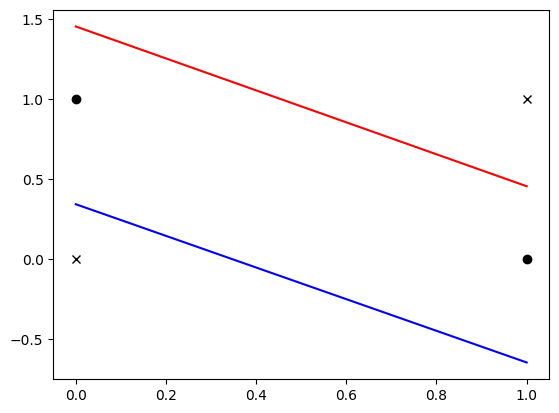

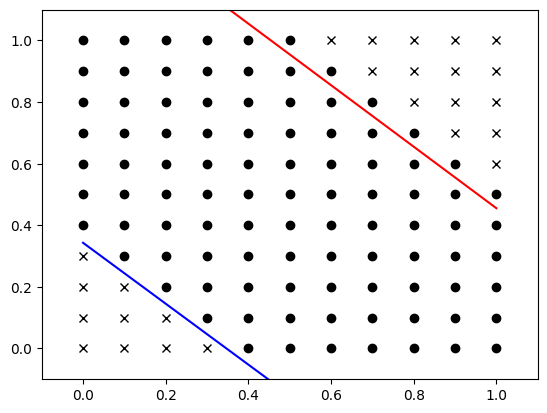

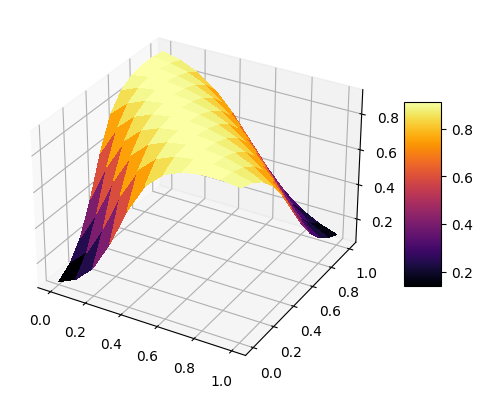

In [27]:
show1(u, 10000)

In [28]:
#Data
L = 2
mi = 0.1
N = [3, 3, 1]

w = [
    [],
    [[],[0,0,0,0],[0,0,0,0],[0,0,0,0]],
    [[],[0,0,0,0]]
]

s = [
    [],
    [None, 0, 0, 0],
    [None, 0]
]

x = [
    [],
    [-1, 0, 0, 0],
    [-1, 0, 0, 0]
]

y = [
    [],
    [None, 0, 0, 0],
    [None, 0]
]

e = [
    [],
    [None, 0, 0, 0],
    [None, 0]
]

dlt = [
    [],
    [None, 0, 0, 0],
    [None, 0]
]

u = [[0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]]
    
d = [0, 1, 1, 0, 1, 0, 0, 1]

In [29]:
def show2(u, n):
    z = np.zeros(len(u))
    l_count = learn(z, n)
    for i in range(len(u)):
        print(u[i], np.round(z[i]))
    print("Liczba epok: ", l_count)

In [30]:
show2(u, 10000)

[0, 0, 0] 0.0
[0, 0, 1] 1.0
[0, 1, 0] 1.0
[0, 1, 1] 0.0
[1, 0, 0] 1.0
[1, 0, 1] 0.0
[1, 1, 0] 0.0
[1, 1, 1] 1.0
Liczba epok:  6649
